In [143]:
# Import das bibliotecas necessárias para o aprendizado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

# Classificadores e afins..
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

from six import StringIO
from IPython.display import Image



#### 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [144]:
# Lendo  o arquivo CSV que contém o dataset escolhido, o qual está disponível em ../dataset/healthcare-dataset-stroke-data.csv
df = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv', sep=',', index_col=0, na_values='?')
#dataset

# PARTE 1 - EDA

## limpeza dos dados:

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [146]:
#columns to lower case
df.columns = map(str.lower, df.columns)

In [147]:
# fill bmi null values with mean
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [148]:
df.gender.value_counts()
df = df.loc[df.gender != 'Other']

In [149]:
print("idade maxima: ", df.age.max())
print("idade minima: ", df.age.min())

idade maxima:  82.0
idade minima:  0.08


In [150]:
df = df.loc[df.age >= 2]

In [151]:
# transforma idade em inteiro:
df['age'] = df['age'].astype(int)

In [152]:
df.work_type.value_counts()

Private          2924
Self-employed     819
Govt_job          657
children          567
Never_worked       22
Name: work_type, dtype: int64

In [153]:
# trabalho em lower case
df.work_type = df.work_type.str.lower()
df.loc[df.work_type == 'govt_job', 'work_type'] = 'government'

In [154]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1424
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [155]:
#df.ever_married.value_counts()
#convertendo ever_married para 0 e 1
df.ever_married = df.ever_married.map({'Yes': 1, 'No': 0})

In [156]:
# fumante em lower case
df.smoking_status = df.smoking_status.str.lower()

## exploratória de variáveis categóricas e não categóricas:


### AVC (stroke)

Text(0, 0.5, '')

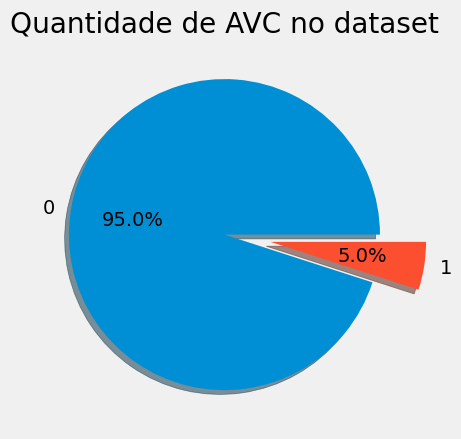

In [157]:
#quantidade de avc no dataset:

fig = df['stroke'].value_counts().plot.pie(
                                        explode = [0,0.3], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        shadow = True,
                                        )

fig.set_title('Quantidade de AVC no dataset')
#set size:
fig.set_ylabel('')

### SEXO:

In [158]:
df.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
Female  0         2797
        1          140
Male    0         1944
        1          108
Name: stroke, dtype: int64

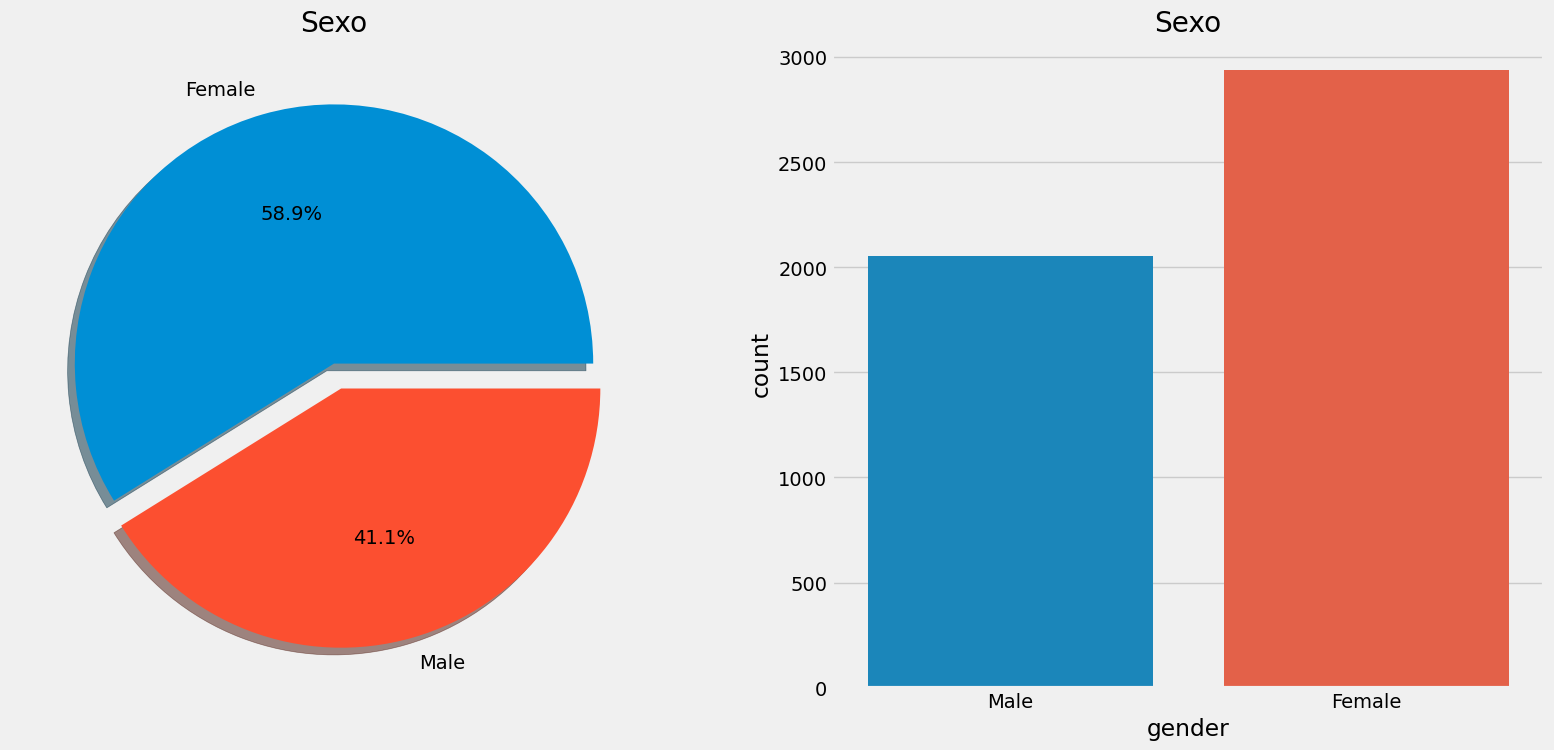

In [159]:
f, ax = plt.subplots(1 ,2 ,figsize = (18,8)) # uma linha e duas colunas de gráficos e o tamanho da figura..
df['gender'].value_counts().plot.pie(
                                        explode = [0,0.1], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        ax = ax[0], #indica onde será plotado a figura, na coluna 1.
                                        shadow = True
                                        )
ax[0].set_title("Sexo")
ax[0].set_ylabel('')

sns.countplot('gender', data = df, ax = ax[1])
ax[1].set_title("Sexo")
plt.show()

Text(0.5, 1.0, 'Sexo: avc vs não avc')

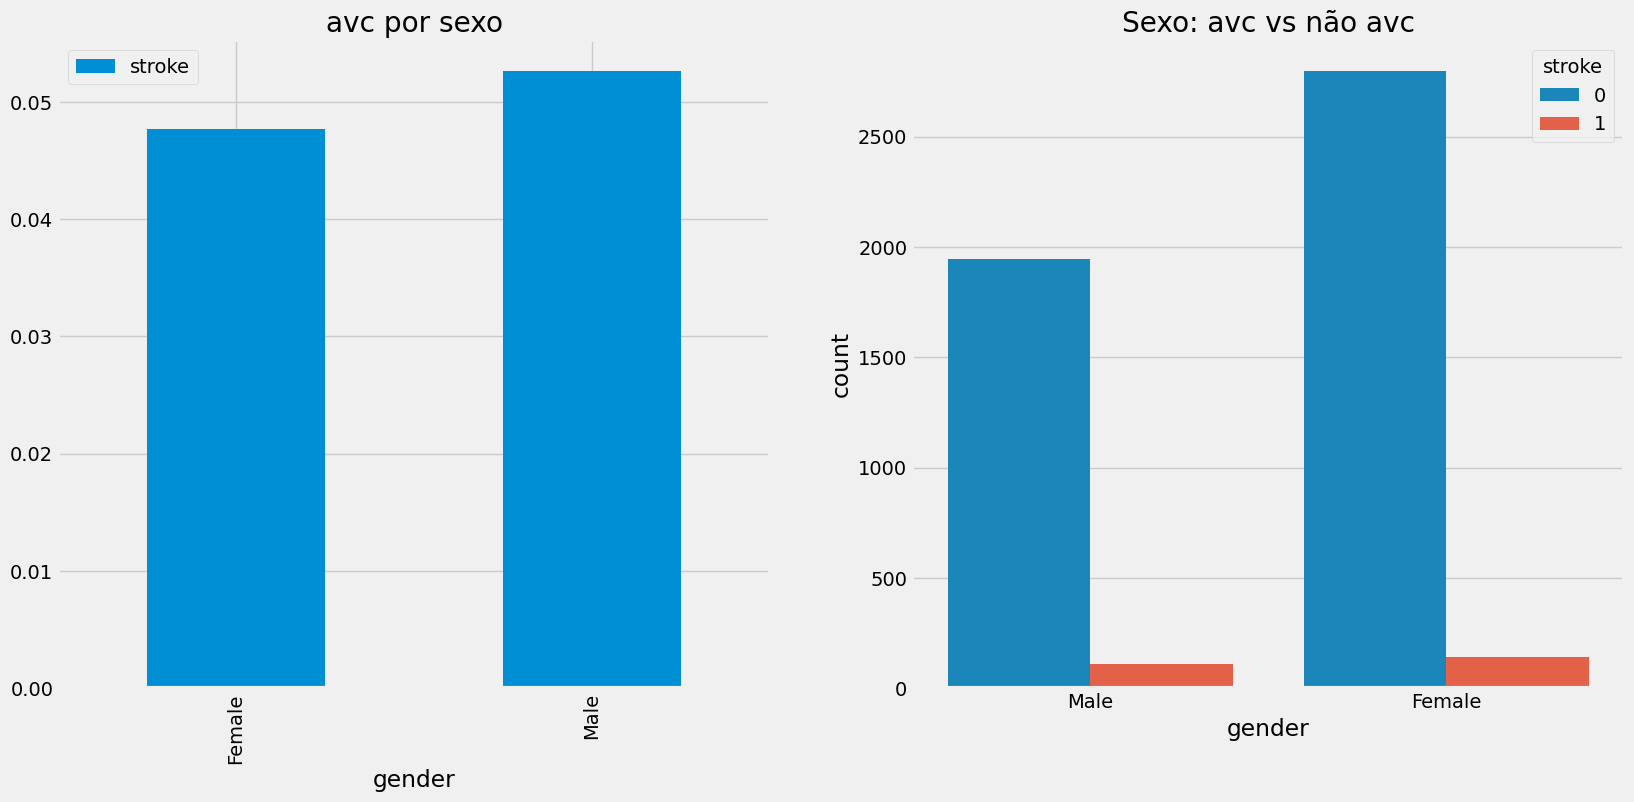

In [160]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df[['gender', 'stroke']].groupby(['gender']).mean().plot.bar(ax = ax[0]) #gráfico da média de sobreviventes.
ax[0].set_title('avc por sexo')

sns.countplot('gender',
              hue = 'stroke', # hue = nunace, que quer dizer para diferenciar os tons, no caso vamos fazer um count de Sexo, entao vamos diferenciar as cores por Sobreviveu ou Não Sobreviveu
              data = df,
              ax = ax[1])
ax[1].set_title('Sexo: avc vs não avc')

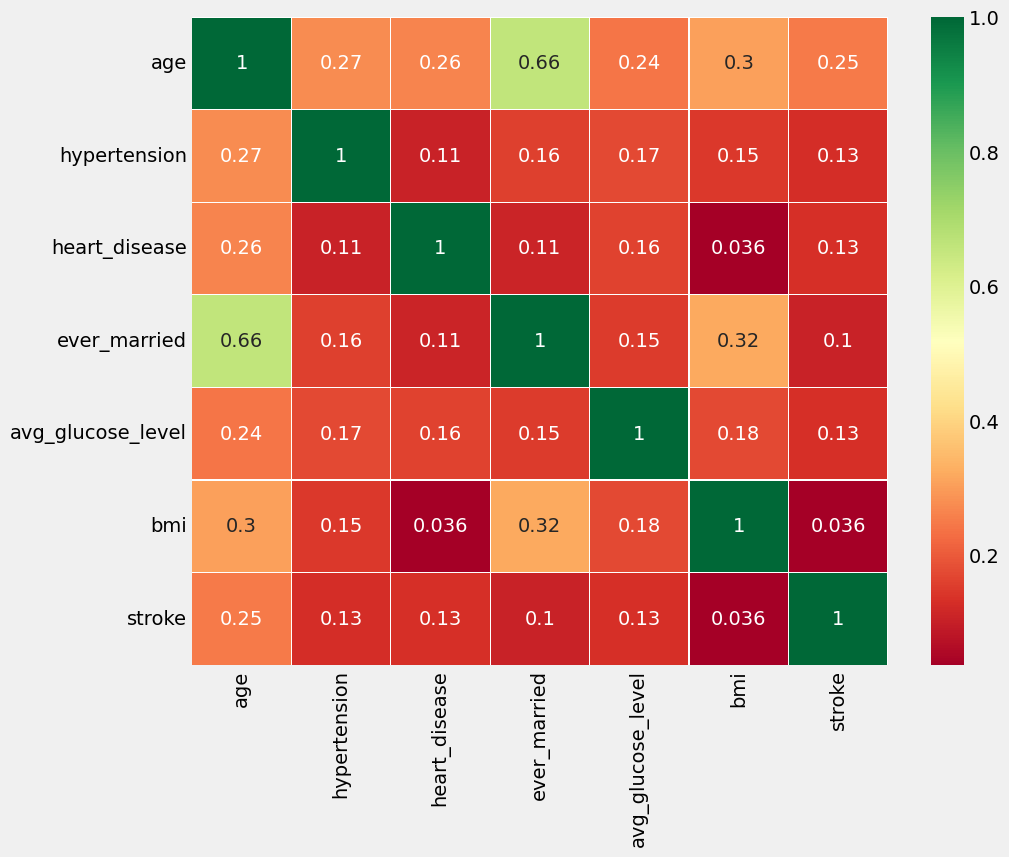

In [161]:
sns.heatmap(
    df.corr(), 
    annot= True,
    cmap = 'RdYlGn', 
    linewidths = 0.2,
    ) #linhas brancas

fig = plt.gcf() #gcf = Get The Current Figure -> Pega a figura acima. -> util para fazer as modificações
fig.set_size_inches(10,8)
plt.show()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4989 non-null   object 
 1   age                4989 non-null   int64  
 2   hypertension       4989 non-null   int64  
 3   heart_disease      4989 non-null   int64  
 4   ever_married       4989 non-null   int64  
 5   work_type          4989 non-null   object 
 6   residence_type     4989 non-null   object 
 7   avg_glucose_level  4989 non-null   float64
 8   bmi                4989 non-null   float64
 9   smoking_status     4989 non-null   object 
 10  stroke             4989 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 467.7+ KB


In [163]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,1,private,Urban,228.69,36.6,formerly smoked,1


encoding

In [170]:
df = pd.get_dummies(df)
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_children,work_type_government,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
id,,,,,,,,,,,,,,,,,,,,
9046,67,0,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,1,1,0,0,0
51676,61,0,0,1,202.21,28.791465,1,1,0,0,0,0,0,1,1,0,0,1,0,0
31112,80,0,1,1,105.92,32.500000,1,0,1,0,0,0,1,0,1,0,0,1,0,0
60182,49,0,0,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,1,0,0,1,0
1665,79,1,0,1,174.12,24.000000,1,1,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80,1,0,1,83.75,28.791465,0,1,0,0,0,0,1,0,0,1,0,1,0,0
44873,81,0,0,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,1,0,1,0,0
19723,35,0,0,1,82.99,30.600000,0,1,0,0,0,0,0,1,1,0,0,1,0,0


target = stroke.

In [178]:
#Importando as bibliotecas necessárias para o ML
#Regressão Logística:
from sklearn.linear_model import LogisticRegression
#Suport Vector Machine:
from sklearn import svm
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier
#treinamento e teste -> data split:
from sklearn.model_selection import train_test_split
# Medidores e outros..
from sklearn import metrics # medir accuracy (eficácia)
from sklearn.metrics import confusion_matrix #matriz de confusão

In [172]:
# Separando o dataset no conjunto de atributos X e classe y.
X = df.loc[:, df.columns != 'stroke']
y = np.array(df.loc[:, df.columns == 'stroke']).ravel()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [183]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)  # Criando o classificador da Árvore de Decisão
model.fit(X_train, y_train)  # Treinando o classificador
prediction1=model.predict(X_test)  # Fazendo a predição no conjunto de teste
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,y_test)) # Avaliando o classificador

The accuracy of the Decision Tree is 0.9142628205128205


In [193]:
# KNN:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,y_test))


The accuracy of the KNN is 0.9439102564102564


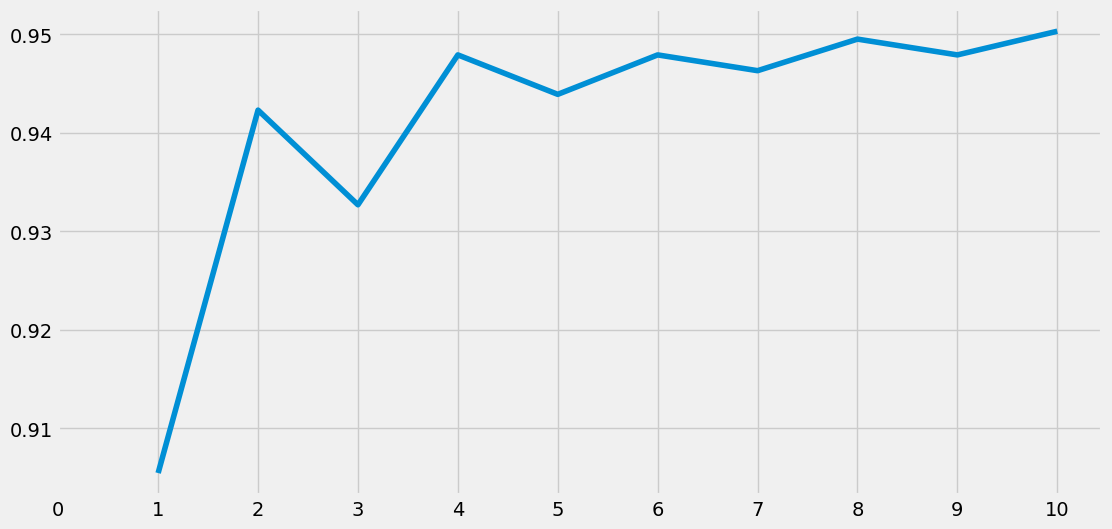

As accuracies de diferentes valores de N são:  [0.90544872 0.94230769 0.93269231 0.94791667 0.94391026 0.94791667
 0.9463141  0.94951923 0.94791667 0.95032051] com o valor máximo em  0.9503205128205128


In [185]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(a_index, a)
plt.xticks(x)

fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print("As acurácias de diferentes valores de N são: ", a.values, "com o valor máximo em ", a.values.max())

In [192]:
# melhor numero de vizinhos é 11

In [186]:
# naive bayes:
model = GaussianNB()
model.fit(X_train,y_train)

prediction3 = model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the NaiveBayes is 0.5440705128205128


In [191]:
from sklearn.model_selection import KFold #K-fold cross validation

from sklearn.model_selection import cross_val_score #valor das pontuações do modelo

from sklearn.model_selection import cross_val_predict # predição dos modelos

In [226]:
kfold = KFold(n_splits= 10, random_state= 22, shuffle= True) #k = 10 divisões em partes iguais

xyz = []
accuracy = []
std = []

classifiers = ['Decision Tree',
               'KNN', 
               'Naive Bayes',]

models = [ DecisionTreeClassifier(criterion='gini', random_state=42),
          KNeighborsClassifier(n_neighbors = 3),
          GaussianNB(),]

for i in models: 
    model = i
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 
                                      'Std' : std},
                                     index = classifiers)
new_models_dataframe2

,CV Mean,Std
Decision Tree,0.902987,0.010607
KNN,0.938865,0.008612
Naive Bayes,0.519146,0.045363


<AxesSubplot:>

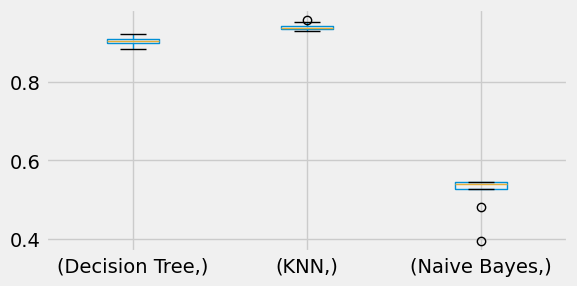

In [227]:
plt.subplots(figsize=(6,3))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

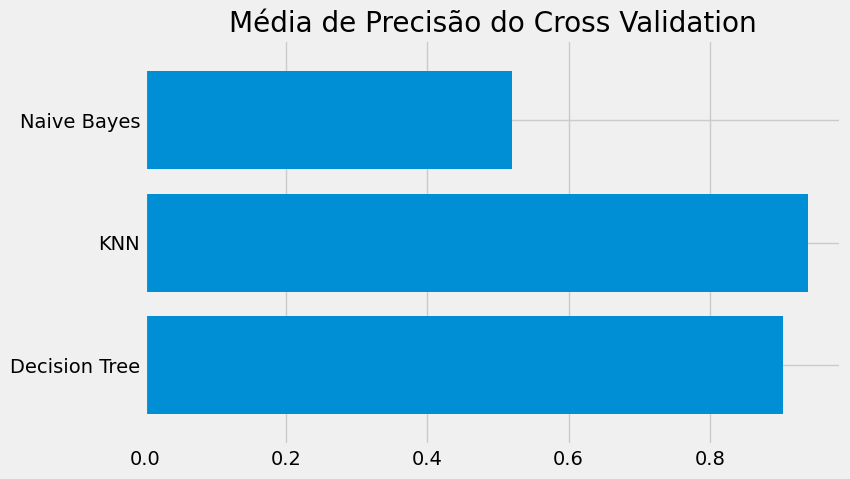

In [228]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)

plt.title('Média de Precisão do Cross Validation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()


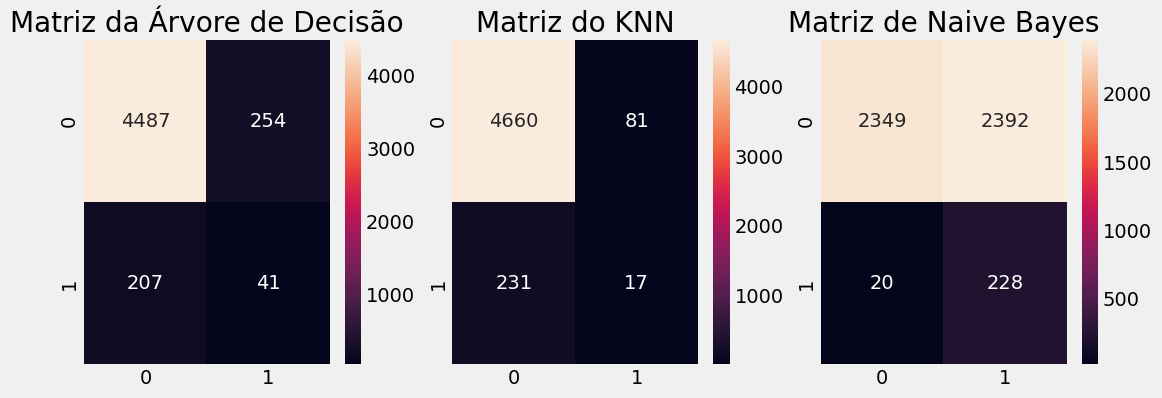

In [229]:
f, ax = plt.subplots(1,3, figsize = (12,4))


y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matriz da Árvore de Decisão')


y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matriz do KNN')


y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2],annot=True,fmt='2.0f')
ax[2].set_title('Matriz de Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()